In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read in the data
df = pd.read_csv('/Users/deepshikasharma/Downloads/Viamo_sample/3m_uganda-3m_uganda_000000000013.csv')

In [3]:
#get relevant columns needed for first analysis in dataframe
df = df[["call_date","listener"]]

In [4]:
#rename listener column by capitalizing the L
df.rename(columns = {'listener':'Listeners'}, inplace = True)

In [5]:
#remove NULL (NaN) values from the listener column
df = df.dropna(subset = ['Listeners'])

In [6]:
#check that all NULL values from listeners column are removed
df.isna().sum()

call_date    0
Listeners    0
dtype: int64

In [7]:
#convert call_date data type from object to datetime
df['call_date'] = pd.to_datetime(df.call_date)

In [8]:
#create new "month" column where the month from the cell_date column is extracted
df['Months'] = df['call_date'].dt.month_name()

In [9]:
#count all active users for each month
mau = df.groupby('Months')['Listeners'].nunique()

In [10]:
#reset the index so the dataframe can be read correctly when plotting
mau = pd.DataFrame(mau).reset_index()

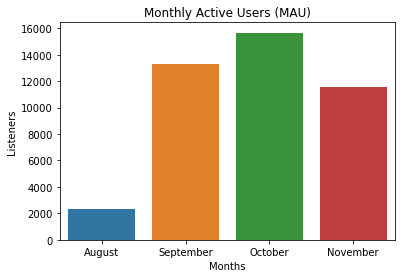

In [11]:
#create bar plot with each month as its own bar
order = ["August", "September", "October", "November"]
sns.barplot(data = mau, x = mau['Months'], y = mau['Listeners'], order = order).set(title = "Monthly Active Users (MAU)")
plt.savefig('Monthly_Active_Users_MAU.jpeg', bbox_inches='tight')

**Note**: for when connecting to full database, change `order` to include all 12 months